### Monte Carlo

Compute pi using Monte Carlo method.

Picture this.
You have a quadrant of a circle with the centre (0, 0) and the radious 1. <br>
Its surface area S is pi /4. <br>

<div>
<img src="./images/pi_picture.png" width="250"/>
</div>

Here, we try to estimate pi in the following way. <br>
You plot a dot randomly within the box and see how many dots fall into the quadrant circle. <br>
Here, the probability will be given by <br>
prob = (surface area of the quadrant circle) / (surface area of the box) = (pi/4) / 1 = pi/4
Therefore, by estimating the probability, you can compute the pi value!

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.html.widgets import interact 
%matplotlib inline

/opt/anaconda3/lib/python3.9/site-packages/IPython/html.py:12: ShimWarning: The `IPython.html` package has been deprecated since IPython 4.0. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  warn("The `IPython.html` package has been deprecated since IPython 4.0. "


In [2]:
plt.style.use("ggplot")
np.random.seed(123)

In [6]:
# Set the max of Monte Carlo step 
n_MonteCarlo = 100

# Get random values 
x_MonteCarlo = np.random.rand(n_MonteCarlo)
y_MonteCarlo = np.random.rand(n_MonteCarlo)

@interact(MonteCarloStep=(0, n_MonteCarlo, 1))
def animation(MonteCarloStep=0):
    plt.figure(figsize=(6,6))
    
    # draw circle and box
    # circle
    x = np.arange(0,1,0.001)
    y = np.sqrt((1 - x ** 2))    
    plt.plot(x, y)
    plt.fill_between(x, y, alpha=0.3)
    # box
    y2 = np.ones(x.shape[0])
    plt.fill_between(x, y, y2, alpha=0.3)
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    
    # Plot the dots up to the Monte Carlo step 
    plt.scatter(x_MonteCarlo[:MonteCarloStep], y_MonteCarlo[:MonteCarloStep], color="black", marker=".")
    
    plt.show()
    
    # Compute the distance between each dot and the centre of the circle (0, 0).
    r = np.sqrt((x_MonteCarlo[:MonteCarloStep] ** 2 + y_MonteCarlo[:MonteCarloStep] ** 2)) 
    
    # Count the number of dots within the circle.
    count = np.sum(np.where(r<=1, 1, 0))
    # Compute the probability
    prob = count / MonteCarloStep
    print("Monte Carlo = ", prob)
    print("Analytic = ", np.pi/4)

interactive(children=(IntSlider(value=0, description='MonteCarloStep'), Output()), _dom_classes=('widget-inter…

Text(0, 0.5, 'probability')

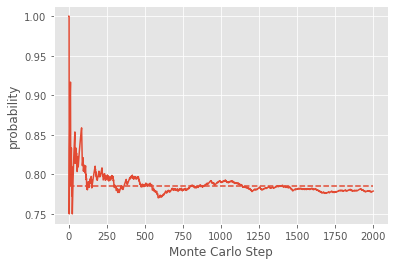

In [4]:
# Set the max of Monte Carlo step 
n_MonteCarlo = 2000

# Get random values 
x_MonteCarlo = np.random.rand(n_MonteCarlo)
y_MonteCarlo = np.random.rand(n_MonteCarlo)

pi_MonteCarloStep = []

# Keep prob as you increase the Monte Carlo step
for MonteCarloStep in range(1, n_MonteCarlo):
    r = (x_MonteCarlo[:MonteCarloStep] ** 2 + y_MonteCarlo[:MonteCarloStep] ** 2) ** (1/2)
    count = np.sum(np.where(r<=1, 1, 0))
    prob = count / MonteCarloStep
    
    pi_MonteCarloStep.append(prob)

pi_x = np.arange(len(pi_MonteCarloStep)) + 1

plt.plot(pi_x, pi_MonteCarloStep)
plt.hlines(np.pi/4, pi_x[0], pi_x[-1], linestyles="dashed")
plt.xlabel("Monte Carlo Step")
plt.ylabel("probability")